<a href="https://colab.research.google.com/github/Muhammad-Bilal-Arshad/Machine-Learning/blob/main/LogisiticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
left = df[df.left==1]
left.shape

(3571, 10)

In [6]:
stayed = df[df.left==0]
stayed.shape

(11428, 10)

<Axes: xlabel='salary'>

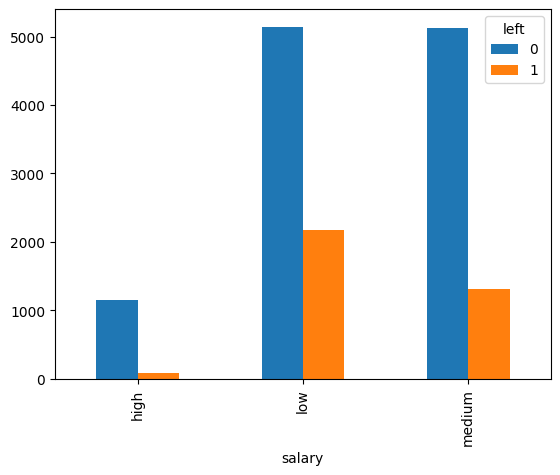

In [8]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<Axes: xlabel='Department'>

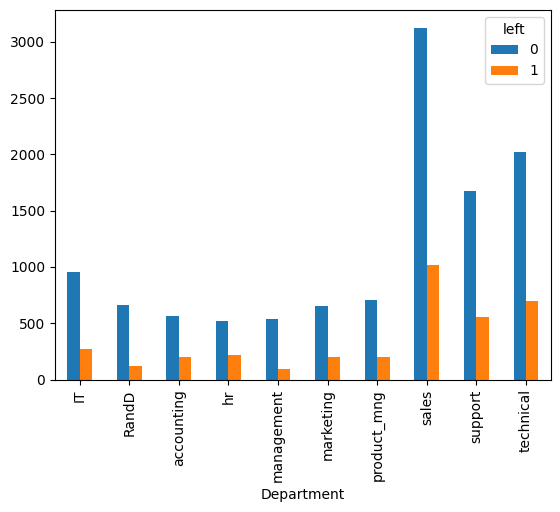

In [9]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

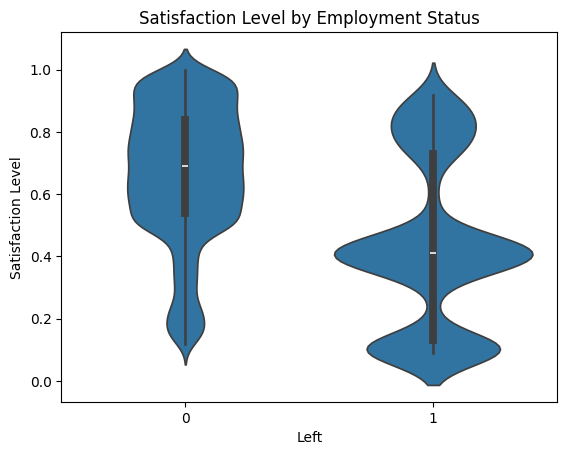

In [19]:
sns.violinplot(x='left', y='satisfaction_level', data=df)
plt.title('Satisfaction Level by Employment Status')
plt.xlabel('Left')
plt.ylabel('Satisfaction Level')
plt.show()

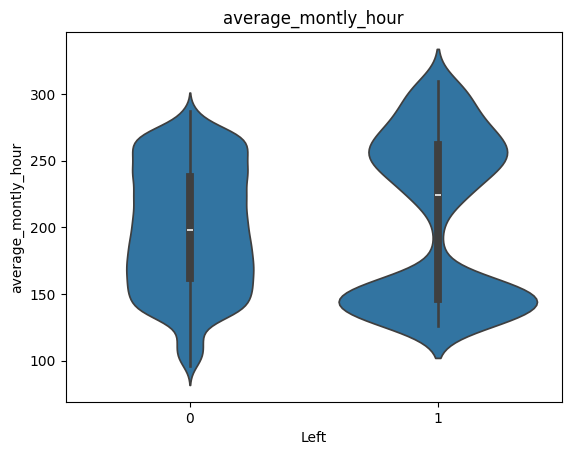

In [22]:
sns.violinplot(x='left', y='average_montly_hours', data=df)
plt.title('average_montly_hour')
plt.xlabel('Left')
plt.ylabel('average_montly_hour')
plt.show()

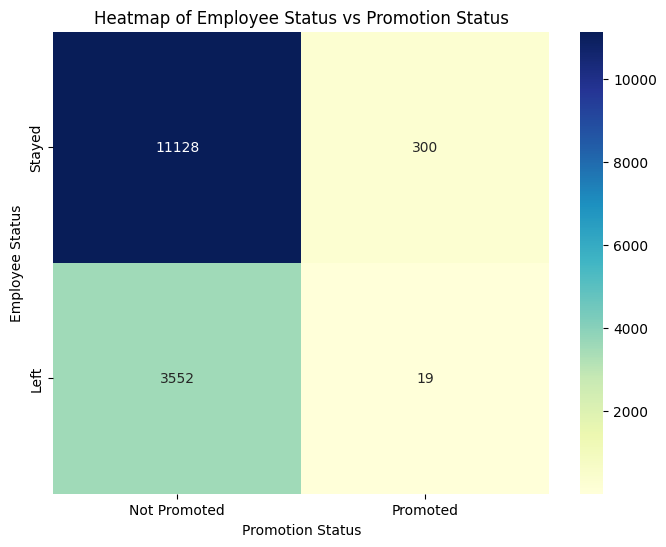

In [54]:
# Create a cross-tabulation of the data
heatmap_data = pd.crosstab(df['left'], df['promotion_last_5years'])

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='d', cbar=True,
            xticklabels=['Not Promoted', 'Promoted'],
            yticklabels=['Stayed', 'Left'])
plt.title('Heatmap of Employee Status vs Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Employee Status')
plt.show()

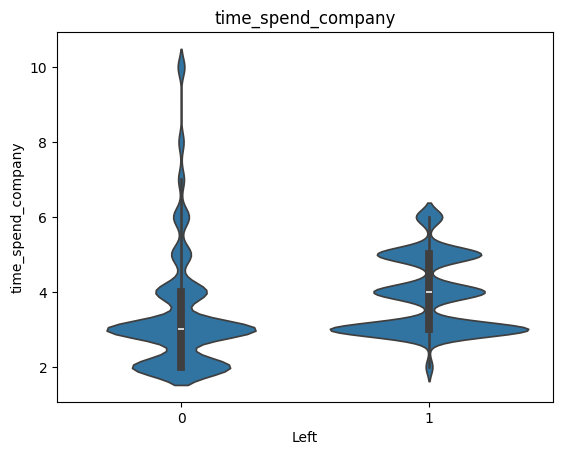

In [68]:
sns.violinplot(x='left', y='time_spend_company', data=df)
plt.title('time_spend_company')
plt.xlabel('Left')
plt.ylabel('time_spend_company')
plt.show()

In [69]:
subdf = df[['satisfaction_level','average_montly_hours','salary','time_spend_company']]
subdf.head()

,satisfaction_level,average_montly_hours,salary,time_spend_company
0,0.38,157,low,3
1,0.80,262,medium,6
2,0.11,272,medium,4
3,0.72,223,low,5
4,0.37,159,low,3


In [70]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
salary_dummies

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [71]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies

,satisfaction_level,average_montly_hours,salary,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,157,low,3,False,True,False
1,0.80,262,medium,6,False,False,True
2,0.11,272,medium,4,False,False,True
3,0.72,223,low,5,False,True,False
4,0.37,159,low,3,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,151,low,3,False,True,False
14995,0.37,160,low,3,False,True,False
14996,0.37,143,low,3,False,True,False
14997,0.11,280,low,4,False,True,False


In [72]:
df_with_no_salary = df_with_dummies.drop('salary', axis = 'columns')
df_with_no_salary

,satisfaction_level,average_montly_hours,time_spend_company,salary_high,salary_low,salary_medium
0,0.38,157,3,False,True,False
1,0.80,262,6,False,False,True
2,0.11,272,4,False,False,True
3,0.72,223,5,False,True,False
4,0.37,159,3,False,True,False
...,...,...,...,...,...,...
14994,0.40,151,3,False,True,False
14995,0.37,160,3,False,True,False
14996,0.37,143,3,False,True,False
14997,0.11,280,4,False,True,False


In [73]:
df_final = df_with_no_salary.drop('salary_medium', axis = 'columns')
df_final

,satisfaction_level,average_montly_hours,time_spend_company,salary_high,salary_low
0,0.38,157,3,False,True
1,0.80,262,6,False,False
2,0.11,272,4,False,False
3,0.72,223,5,False,True
4,0.37,159,3,False,True
...,...,...,...,...,...
14994,0.40,151,3,False,True
14995,0.37,160,3,False,True
14996,0.37,143,3,False,True
14997,0.11,280,4,False,True


In [74]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [75]:
X = df_final
Y = df.left

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,train_size = 0.99)

In [77]:
model.fit(X_train,Y_train)

LogisticRegression()

In [78]:
model.predict(X_test)

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [79]:
Y_test

7494     0
7231     0
1698     1
417      1
7200     0
        ..
11706    0
12891    0
847      1
10709    0
301      1
Name: left, Length: 150, dtype: int64

In [80]:
model.score(X_test,Y_test)

0.82